## Image Segmentation with K-means & Gaussian Mixture Models

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import stats
from sklearn.cluster import MiniBatchKMeans
from sklearn.mixture import GaussianMixture
from skimage.transform import rescale
from skimage.color import rgb2gray
plt.style.use('jpg.mplstyle')

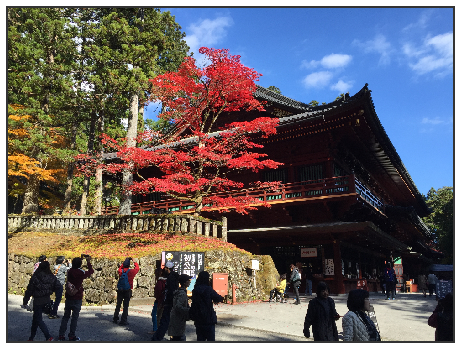

In [2]:
nikko = rescale(mpimg.imread('nikko.jpg'), 0.3)
data = nikko.reshape(nikko.shape[0]*nikko.shape[1], 3)
plt.figure(figsize=(8, 8))
plt.gca().set(xticks=[], yticks=[])
plt.imshow(nikko);

In [3]:
def plot_color_space(image, data, color_arr, title):  
    idx = np.random.choice(np.arange(data.shape[0]), size=10000, replace=False)
    r, g, b = data[idx].T
    grid = plt.GridSpec(2, 3, wspace=0.3, hspace=0)
    plt.figure(figsize=(14, 7))
    im_ax = plt.subplot(grid[0:2, 0:2], xticks=[], yticks=[])
    rg_ax = plt.subplot(grid[0, 2], xticks=[])
    rb_ax = plt.subplot(grid[1, 2])  
    im_ax.imshow(image)
    for y_dat, ax, ylabel in zip([g, b], [rg_ax, rb_ax], ['Green', 'Blue']):
        ax.set_xlabel('Red', fontsize=15)
        ax.set_ylabel(ylabel, fontsize=15)
        ax.scatter(r, y_dat, c=color_arr[idx], marker='.')
    im_ax.set_title(title, fontsize=23);

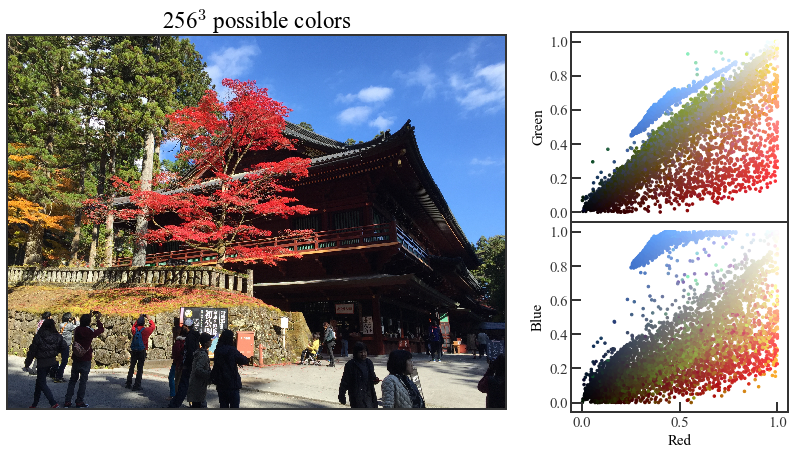

In [4]:
plot_color_space(nikko, data, data, '256$^3$ possible colors')

In [5]:
compressed = {}
k_vals = [2, 4, 8, 16]
for k in k_vals:
    kmeans = MiniBatchKMeans(k)
    kmeans.fit(data)
    compressed[k] = kmeans.cluster_centers_[kmeans.predict(data)]

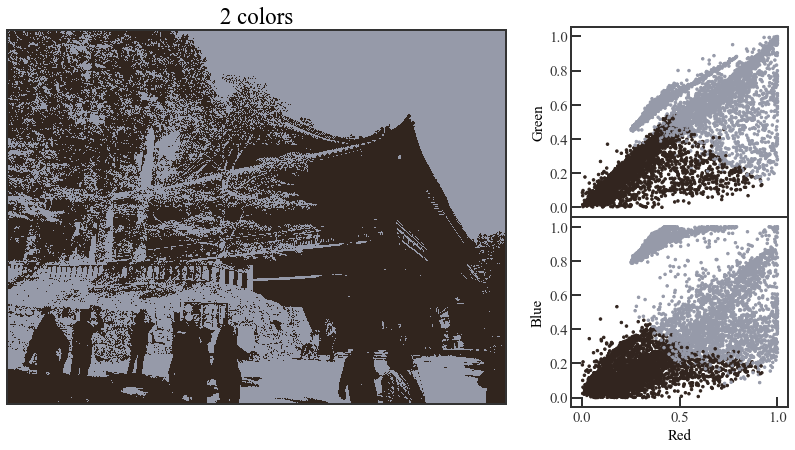

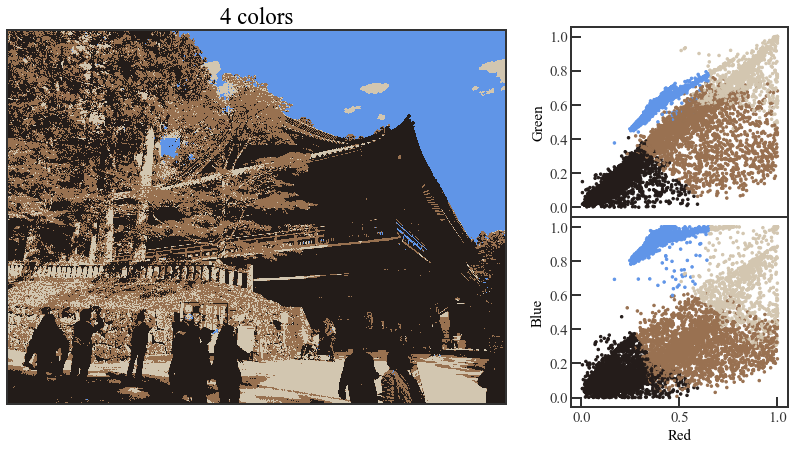

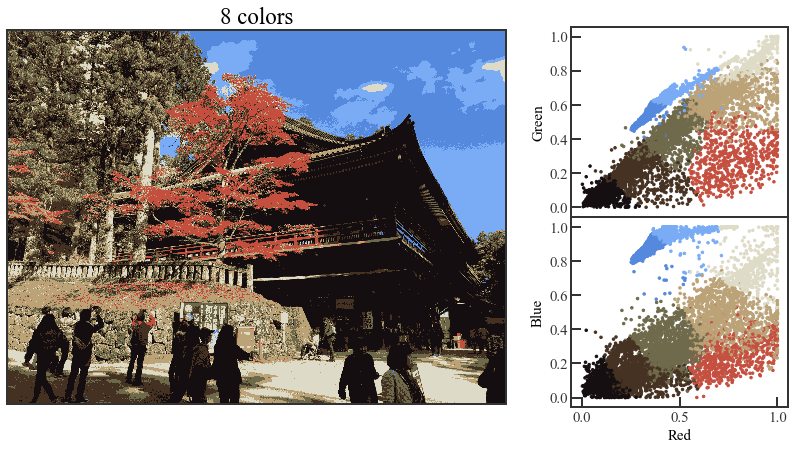

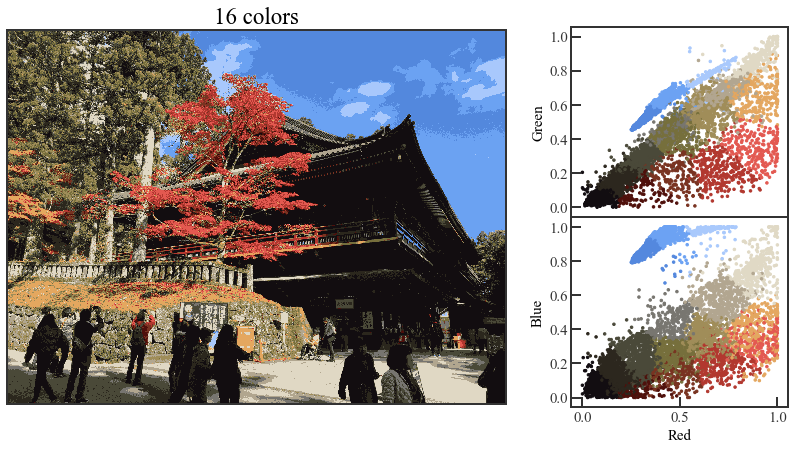

In [6]:
for k in k_vals:
    new_img = compressed[k].reshape(nikko.shape)
    plot_color_space(new_img, data, compressed[k], '{} colors'.format(k))

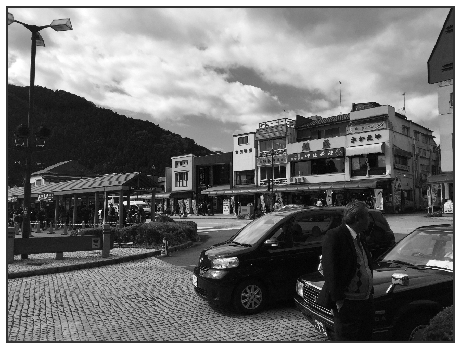

In [7]:
town = rescale(mpimg.imread('town.jpg'), 0.4)
town = rgb2gray(town)
plt.figure(figsize=(8, 8))
plt.gca().set(xticks=[], yticks=[])
plt.imshow(town, cmap='gray');

In [8]:
def plot_seg_image(clf):
    fig, ax = plt.subplots(1, 2, figsize=(12,4))
    cmap = plt.cm.get_cmap('Spectral', clf.n_components)

    ax[0].imshow(clf.means_[clf.predict(X)].reshape(town.shape), cmap=cmap)
    ax[0].set(xticks=[], yticks=[])
    ax[1].hist(town.flatten(), bins='auto', normed=True, alpha=0.4, color='gray')
    
    xpdf = np.linspace(0, 1, 1000)
    density = np.exp(clf.score_samples(xpdf.reshape(-1, 1)))
    ax[1].plot(xpdf, density, 'k--', zorder=10, lw=2)
    ax[1].set_xlabel('pixel values')

    for i in range(clf.n_components):
        pdf = clf.weights_[i]*stats.norm(
            clf.means_[i, 0], np.sqrt(clf.covariances_[i, 0])).pdf(xpdf)
        ax[1].plot(xpdf, pdf, '-', c=cmap(clf.means_[i, 0]), lw=4)
    fig.suptitle('{} Gaussians'.format(clf.n_components), fontsize=22)

In [9]:
X = town.flatten().reshape(-1,1)
n_comps = [2, 3, 4, 5]
clf = {}
for n_comp in n_comps:
    gmm = GaussianMixture(n_comp, covariance_type='full')
    clf[n_comp] = gmm.fit(X)

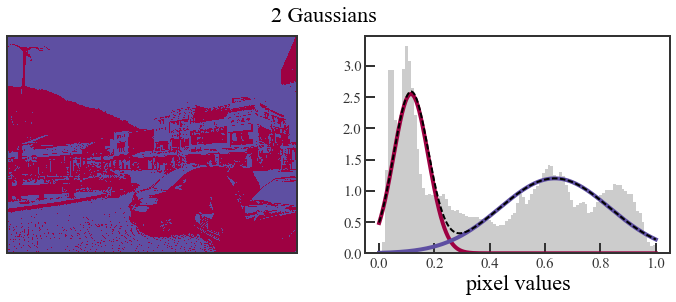

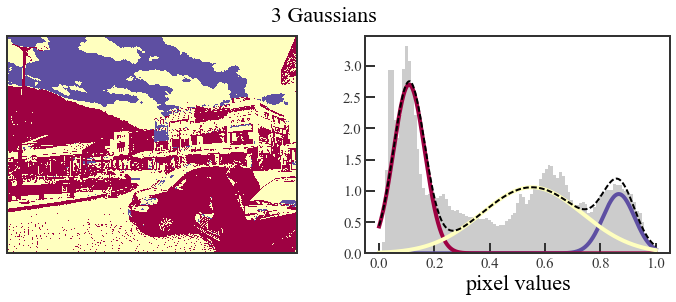

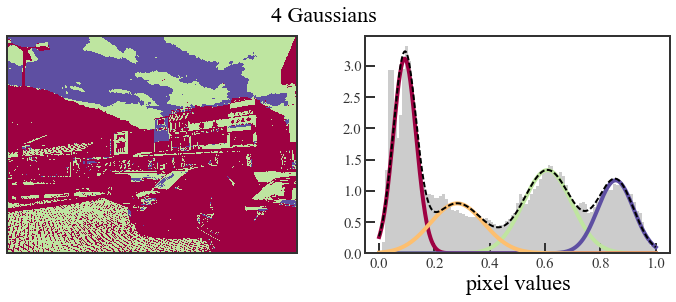

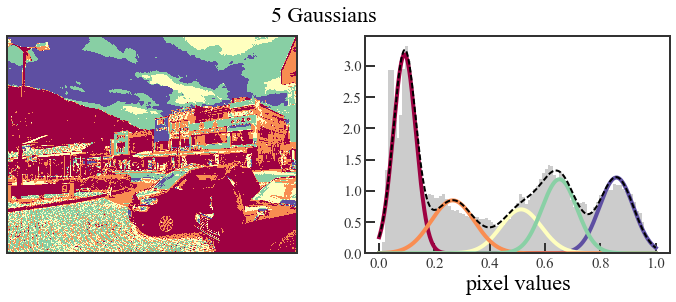

In [10]:
for n_comp in n_comps:    
    plot_seg_image(clf[n_comp])